In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import subprocess
from itertools import product

In [2]:
path = '../'
executable = 'bin/ex1'
# config_file = 'bin/configuration.in.example'

In [3]:
def stringify_dict(d: dict, sep=',') -> str:
    return sep.join(map(lambda a: str(a[0]) + "=" + str(a[1]), tuple(d.items())))

In [4]:
def run(config_file: str, output_file: str, params: dict = {}) -> None:
    # print(f"Running with config file {config_file}")
    options = stringify_dict(params, sep=' ')
    cmd = f"{path}{executable} {path}{config_file} output='{path}{output_file}' {options}"
    print(f"Running command `{cmd}`")
    subprocess.run(cmd, shell=True, stdout=subprocess.DEVNULL)
    # print("Done")

In [5]:
nsteps = np.array([5, 10, 50, 80, *range(100, 2000, 100)]) # TODO change
nsimul = len(nsteps)  # Number of simulations to perform

m = 0.056
v0 = 5
omega = 10
mu = 6
rho = 1.2
R = 0.033

tfin = 60
dt = tfin / nsteps

In [6]:
alpha = mu * omega * R**3 * rho / m
x_th  = lambda t: v0 / alpha * np.sin(alpha * t)
y_th  = lambda t: v0 / alpha - v0 / alpha * np.cos(alpha * t)
vx_th = lambda t: v0 * np.cos(alpha * t)
vy_th = lambda t: v0 * np.sin(alpha * t)

In [7]:
%%bash
cd .. && make clean && make

rm: cannot remove 'data/*.log': No such file or directory


clang++ -o bin/ex1 src/Exercice1_student.cpp -std=c++17 -Wall -Wextra -O2 


In [8]:
params_variations = {
    'nsteps': nsteps,
    'alpha': [0, 0.5, 1],
}
config_name = "nograv"
all_params = tuple(
    {a: b for a, b in zip(params_variations.keys(), c)} for c in product(*params_variations.values())
)

# Run simulations
outputs = []  # List to store output file names
for params in all_params:
    output_file = f"data/{config_name},{stringify_dict(params)}.out"
    outputs.append(output_file)
    run(f'bin/{config_name}.conf', output_file, params)

Running command `../bin/ex1 ../bin/nograv.conf output='../data/nograv,nsteps=5,alpha=0.out' nsteps=5 alpha=0`
Running command `../bin/ex1 ../bin/nograv.conf output='../data/nograv,nsteps=5,alpha=0.5.out' nsteps=5 alpha=0.5`
Running command `../bin/ex1 ../bin/nograv.conf output='../data/nograv,nsteps=5,alpha=1.out' nsteps=5 alpha=1`
Running command `../bin/ex1 ../bin/nograv.conf output='../data/nograv,nsteps=10,alpha=0.out' nsteps=10 alpha=0`
Running command `../bin/ex1 ../bin/nograv.conf output='../data/nograv,nsteps=10,alpha=0.5.out' nsteps=10 alpha=0.5`
Running command `../bin/ex1 ../bin/nograv.conf output='../data/nograv,nsteps=10,alpha=1.out' nsteps=10 alpha=1`
Running command `../bin/ex1 ../bin/nograv.conf output='../data/nograv,nsteps=50,alpha=0.out' nsteps=50 alpha=0`
Running command `../bin/ex1 ../bin/nograv.conf output='../data/nograv,nsteps=50,alpha=0.5.out' nsteps=50 alpha=0.5`
Running command `../bin/ex1 ../bin/nograv.conf output='../data/nograv,nsteps=50,alpha=1.out' nstep

In [9]:
# Filter stuff
explicit = []
implicit = []
semi_implicit = []

for file, params in zip(outputs, all_params):
    match params:
        case {'alpha': 0}: explicit.append((file, params))
        case {'alpha': 0.5}: semi_implicit.append((file, params))
        case {'alpha': 1}: implicit.append((file, params))
        case _: print("Feur alert")

print(semi_implicit)

[('data/nograv,nsteps=5,alpha=0.5.out', {'nsteps': 5, 'alpha': 0.5}), ('data/nograv,nsteps=10,alpha=0.5.out', {'nsteps': 10, 'alpha': 0.5}), ('data/nograv,nsteps=50,alpha=0.5.out', {'nsteps': 50, 'alpha': 0.5}), ('data/nograv,nsteps=80,alpha=0.5.out', {'nsteps': 80, 'alpha': 0.5}), ('data/nograv,nsteps=100,alpha=0.5.out', {'nsteps': 100, 'alpha': 0.5}), ('data/nograv,nsteps=200,alpha=0.5.out', {'nsteps': 200, 'alpha': 0.5}), ('data/nograv,nsteps=300,alpha=0.5.out', {'nsteps': 300, 'alpha': 0.5}), ('data/nograv,nsteps=400,alpha=0.5.out', {'nsteps': 400, 'alpha': 0.5}), ('data/nograv,nsteps=500,alpha=0.5.out', {'nsteps': 500, 'alpha': 0.5}), ('data/nograv,nsteps=600,alpha=0.5.out', {'nsteps': 600, 'alpha': 0.5}), ('data/nograv,nsteps=700,alpha=0.5.out', {'nsteps': 700, 'alpha': 0.5}), ('data/nograv,nsteps=800,alpha=0.5.out', {'nsteps': 800, 'alpha': 0.5}), ('data/nograv,nsteps=900,alpha=0.5.out', {'nsteps': 900, 'alpha': 0.5}), ('data/nograv,nsteps=1000,alpha=0.5.out', {'nsteps': 1000, '

# Plots!

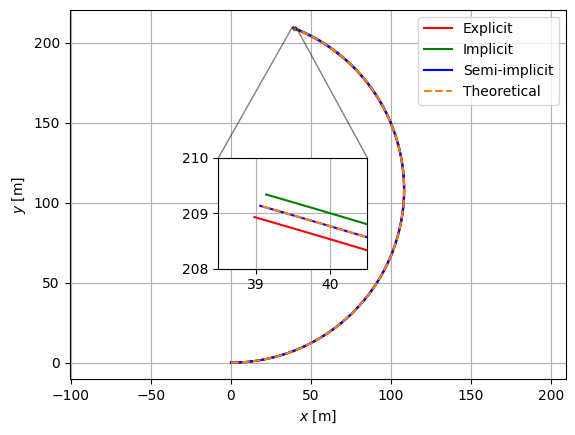

In [10]:
data = np.loadtxt(path + explicit[-1][0])
xx1, yy1 = data[:, 1], data[:, 2]
data = np.loadtxt(path + implicit[-1][0])
xx2, yy2 = data[:, 1], data[:, 2]
data = np.loadtxt(path + semi_implicit[-1][0])
xx3, yy3 = data[:, 1], data[:, 2]
xx_th, yy_th = x_th(data[:,0]), y_th(data[:,0])
plt.plot(xx1, yy1, c='r', label='Explicit')
plt.plot(xx2, yy2, c='g', label='Implicit')
plt.plot(xx3, yy3, c='b', label='Semi-implicit')
plt.plot(xx_th, yy_th, c='tab:orange', ls='--', label='Theoretical')


# inset axes....
x1, x2, y1, y2 = 38.5, 40.5, 208, 210
axins = plt.gca().inset_axes(
    [0.3, 0.3, 0.3, 0.3],
    xlim=(x1, x2), ylim=(y1, y2)
)
axins.plot(xx1, yy1, c='r', label='Explicit')
axins.plot(xx2, yy2, c='g', label='Implicit')
axins.plot(xx3, yy3, c='b', label='Semi-implicit')
axins.plot(xx_th, yy_th, c='tab:orange', ls='--', label='Theoretical')
axins.grid()

plt.gca().indicate_inset_zoom(axins, edgecolor="black")

plt.axis('equal')
plt.xlabel(r'$x$ [m]')
plt.ylabel(r'$y$ [m]')
plt.grid()
plt.legend()
plt.show()

## Position error

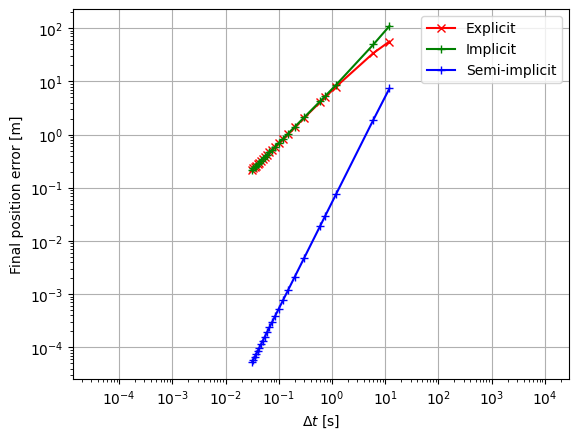

In [11]:
%matplotlib inline
def calculate_errors(dataset):
    position_error = np.zeros(nsimul)
    energy_error = np.zeros(nsimul)

    for i, (file, params) in enumerate(dataset):
        data = np.loadtxt(path + file)
        t, xx, yy, vx, vy, En = data[:, 0], data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5]
        position_error[i] = np.linalg.norm((xx[-1] - x_th(t[-1]), yy[-1] - y_th(t[-1])))
        energy_error[i] = np.max(En) - np.min(En)
    return position_error, energy_error

p1, e1 = calculate_errors(explicit)
p2, e2 = calculate_errors(implicit)
p3, e3 = calculate_errors(semi_implicit)
plt.loglog(dt, p1, 'rx-', label='Explicit')
plt.loglog(dt, p2, 'g+-', label='Implicit')
plt.loglog(dt, p3, 'b+-', label='Semi-implicit')

plt.xlabel(r'$\Delta t$ [s]')
plt.ylabel(r'Final position error [m]')
plt.xticks()
plt.yticks()
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()

## Energy error

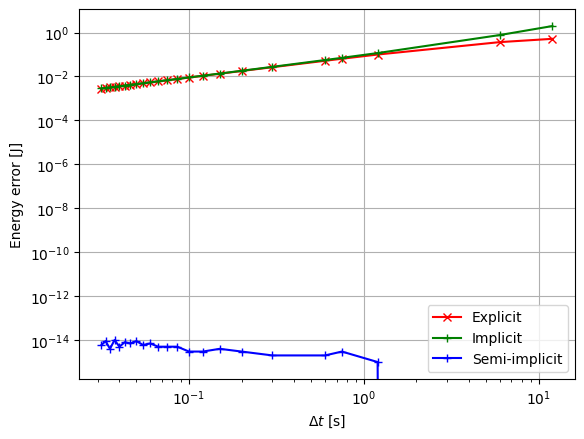

In [12]:
%matplotlib inline
plt.loglog(dt, e1, 'rx-', label='Explicit')
plt.loglog(dt, e2, 'g+-', label='Implicit')
plt.loglog(dt, e3, 'b+-', label='Semi-implicit')
plt.xlabel(r'$\Delta t$ [s]')
plt.ylabel(r'Energy error [J]')
plt.xticks()
plt.yticks()
plt.grid()
plt.legend()
plt.show()

## Energy steps

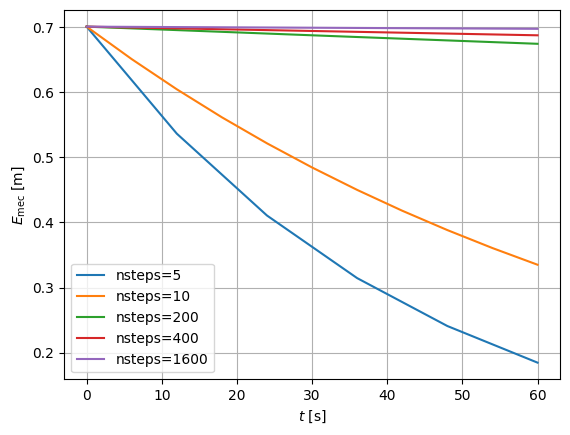

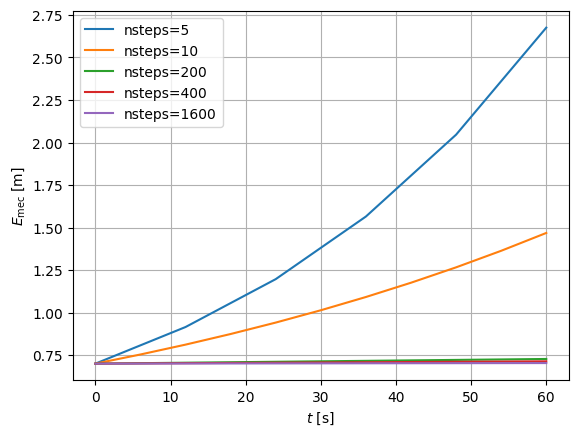

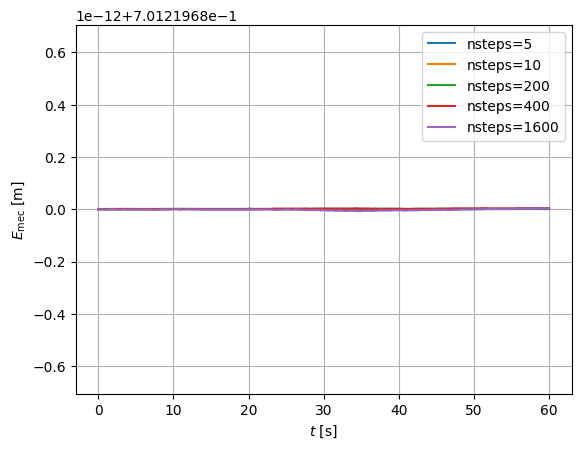

In [13]:
%matplotlib inline

def plot_energies(dataset):
    for i, (file, params) in enumerate(dataset):
        if params['nsteps'] not in [5, 10, 200, 400, 1600]:
            continue
        data = np.loadtxt(path + file)
        t, En1 = data[:, 0], data[:, 5]
        plt.plot(t, En1, label=f"nsteps={params['nsteps']}")
    plt.xlabel(r'$t$ [s]')
    plt.ylabel(r'$E_\text{mec}$ [m]')
    plt.xticks()
    plt.yticks()
    plt.grid()
    plt.legend()

plot_energies(explicit)
plt.show()
plot_energies(implicit)
plt.show()
plot_energies(semi_implicit)
plt.show()


In [14]:
"""
Si on n'a pas la solution analytique: on représente la quantite voulue
(ci-dessous v_y, TODO: modifier selon vos besoins)
en fonction de (Delta t)^norder, ou norder est un entier.
"""
# norder = 1  # TODO: Modify if needed

# plt.figure()
# plt.plot(dt**norder, vy_list, 'k+-', linewidth=lw)
# plt.xlabel(r'$\Delta t$ [s]', fontsize=fs)
# plt.ylabel(r'$v_y$ [m/s]', fontsize=fs)
# plt.xticks(fontsize=fs)
# plt.yticks(fontsize=fs)
# plt.grid()

"\nSi on n'a pas la solution analytique: on représente la quantite voulue\n(ci-dessous v_y, TODO: modifier selon vos besoins)\nen fonction de (Delta t)^norder, ou norder est un entier.\n"